In [6]:
import os
import sys

sys.path.append("/home/marsdenlab/projects/dl_template")
sys.path.append("/home/marsdenlab/projects/dl_template/scripts")
sys.path.append("/home/marsdenlab/projects/")

import json
import numpy as np
from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt
from xmlGroupsToJson import parse_xml 

import seg_regression.modules.io as io

plt.style.use('seaborn-whitegrid')
matplotlib.rc('text', usetex=True)
matplotlib.rcParams.update({"font.size":22})

In [7]:
SPACING = 0.029
DIMS    = 160
DIMS_VEC = [DIMS, DIMS]
ORIGIN  = [0, 0]
SPACING_VEC = [SPACING, SPACING]

top_dir = "/home/marsdenlab/projects/SV/user_variation"

out_dir = '../results/user_variation'

xml_dirs = {
    "OSMSC0171": [
        top_dir+'/171_old/0171_1/Segmentations',
        top_dir+'/171_old/0171_2/Segmentations',
        top_dir+'/171_old/0171_3/Segmentations'
    ],
    
    "0144":[
        top_dir+'/0144/0144_gt/Segmentations',
        top_dir+'/0144/0144_aekaansh/Segmentations',
        top_dir+'/0144/0144_martin/Segmentations'
    ],
        "kdr":[
        top_dir+'/kdr_aekaansh/KDR33_old/Segmentations',
        top_dir+'/kdr_johnathan/KDR33_old/Segmentations',
        top_dir+'/kdr_noelia/KDR33_old/Segmentations'
    ],
        "su0259":[
        top_dir+'/pulm_ingrid/SU0259_2011_old/Segmentations',
        top_dir+'/pulm_melody/SU0259_2011_old/Segmentations',
        top_dir+'/pulm_stephanie/SU0259_2011_old/Segmentations'
    ]
}

case_files = {
    "OSMSC0171":[],
    "0144":[],
    "kdr":[],
    "su0259":[]
}

In [8]:
for case in xml_dirs:
    od = out_dir+'/'+case
    try:
        os.mkdir(od)
    except:
        print(od, " already exists")
        
    dirs = xml_dirs[case]
    
    for i in range(len(dirs)):
        odd = od+'/'+str(i)
        try:
            os.mkdir(odd)
        except:
            print(odd, " already exists")
            
        d = dirs[i]
        
        segs = os.listdir(d)
        for s in segs:
            parse_xml(d+'/'+s, odd, "a")
            
        files = os.listdir(odd)
        files = [odd+'/'+f for f in files]
        
        case_files[case] += files

../results/user_variation/OSMSC0171  already exists
../results/user_variation/OSMSC0171/0  already exists
../results/user_variation/OSMSC0171/1  already exists
../results/user_variation/OSMSC0171/2  already exists
../results/user_variation/0144  already exists
../results/user_variation/0144/0  already exists
../results/user_variation/0144/1  already exists
../results/user_variation/0144/2  already exists
../results/user_variation/kdr  already exists
../results/user_variation/kdr/0  already exists
../results/user_variation/kdr/1  already exists
../results/user_variation/kdr/2  already exists
../results/user_variation/su0259  already exists
../results/user_variation/su0259/0  already exists
../results/user_variation/su0259/1  already exists
../results/user_variation/su0259/2  already exists


In [9]:
r_means = []
r_stds  = []

NEW_SPACING = 0.029

for key,files in case_files.items():
    for file in files:
        fn = file.split('/')[-1]
        
        all_fn = [f for f in files if fn in f]
        
        radiuses = []
        
        for f in all_fn:
            jd = io.load_json(f)
            
            c = np.array(jd['contour2D'])
            inds = np.arange(c.shape[0])
            
            r = np.mean(np.sqrt(np.sum(c**2,axis=1)))
            radiuses.append(r)
            
        r_means.append(np.mean(radiuses))
        r_stds.append(np.std(radiuses))
        
r_means = np.array(r_means)
r_stds = np.array(r_stds)
r_stds_norm = r_stds/r_means

No handles with labels found to put in legend.


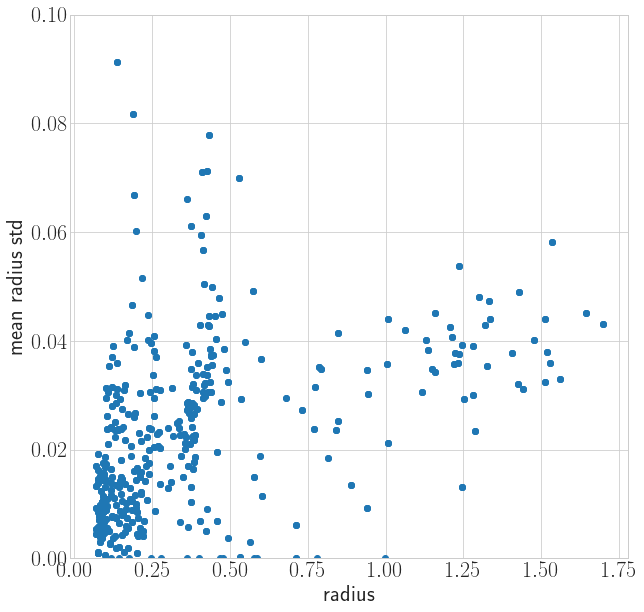

No handles with labels found to put in legend.


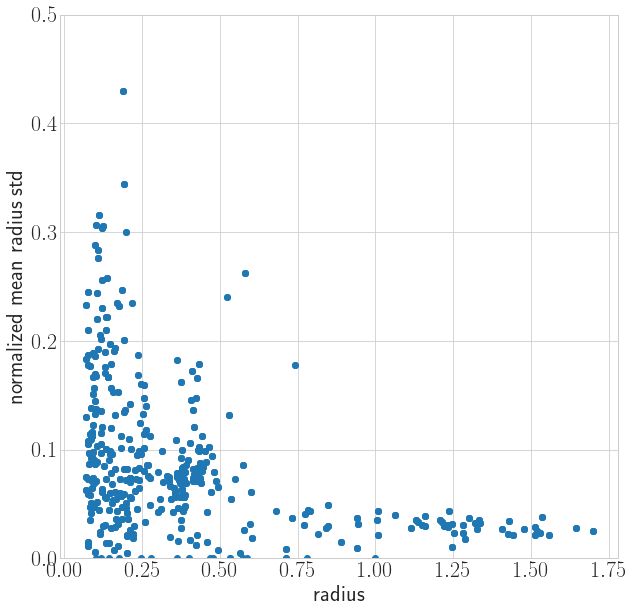

In [14]:
plt.figure(figsize=(10,10))
plt.plot(r_means, r_stds, marker='o', linestyle='')
plt.legend()
plt.xlabel('radius')
plt.ylabel('mean radius std')
plt.ylim(0,0.1)
plt.savefig('radius_user_std.png', dpi=300)
plt.show()

plt.figure(figsize=(10,10))
plt.plot(r_means, r_stds_norm, marker='o', linestyle='')
plt.legend()
plt.xlabel('radius')
plt.ylabel('normalized mean radius std')
plt.ylim(0,0.5)
plt.savefig('norm_radius_user_std.png', dpi=300)
plt.show()

In [11]:
inds = r_means < 0.5
stds = r_stds_norm[inds]
print(np.mean(stds))
print(np.std(stds))

0.10233765799583779
0.07591410248679419


In [12]:
inds = r_means > 0.5
stds = r_stds_norm[inds]
print(np.mean(stds))
print(np.std(stds))

0.04614878157609909
0.08418195092977583


In [13]:
print(jd)

{'code': 'a', 'contour2D': [[0.04351694608184125, 0.0944244372626131], [0.012221100169051601, 0.09811602475285681], [-0.019515532313175352, 0.0985017130660486], [-0.04937882190955787, 0.09359796265416616], [-0.07505463916453399, 0.08142123396905224], [-0.09422885462273371, 0.05998798746267668], [-0.10497302707194944, 0.02840563033256101], [-0.1069014682729556, -0.009854643241277432], [-0.10001417822993322, -0.050230692333071335], [-0.08431115694679504, -0.08816037601724236], [-0.05979240442773529, -0.11908155336802559], [-0.02706400219830147, -0.13942385322603087], [0.010843642129788979, -0.1495839834968025], [0.05029403942343939, -0.15095042185228424], [0.08765070054929955, -0.1449116459642036], [0.11927713637428981, -0.13285613350449804], [0.14241843088799705, -0.11616134248021916], [0.15784596057143901, -0.09616065223944836], [0.16721267502829307, -0.07417642246539993], [0.17217152386247436, -0.05153101284141863], [0.17437545667779936, -0.029546783050810096], [0.17509173483761986, -